DATOS CONTENIDOS :
El archivo results.csv incluye las siguientes columnas:

date – fecha del partido
home_team – nombre del equipo local
away_team – nombre del equipo visitante
home_score – marcador final del equipo local, incluyendo tiempo extra pero sin contar los penaltis
away_score – marcador final del equipo visitante, incluyendo tiempo extra pero sin contar los penaltis
tournament – nombre del torneo
city – nombre de la ciudad/pueblo/unidad administrativa donde se jugó el partido
country – nombre del país donde se jugó el partido
neutral – columna de tipo VERDADERO/FALSO que indica si el partido se jugó en campo neutral

El archivo shootouts.csv incluye las siguientes columnas:

date – fecha del partido
home_team – nombre del equipo local
away_team – nombre del equipo visitante
winner – ganador de la tanda de penaltis
first_shooter – equipo que lanzó primero en la tanda de penaltis

El archivo goalscorers.csv incluye las siguientes columnas:

date – fecha del partido
home_team – nombre del equipo local
away_team – nombre del equipo visitante
team – nombre del equipo que marcó el gol
scorer – nombre del jugador que marcó el gol
own_goal – indica si el gol fue en propia puerta
penalty – indica si el gol fue de penalti

El archivo former_names.csv incluye las siguientes columnas:

current – nombre actual del equipo (o el último nombre si el equipo ya no existe)
former – antiguo nombre utilizado por dicho equipo
start_date – fecha en la que se empezó a usar el nombre anterior
end_date – fecha en la que se dejó de usar el nombre anterior


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data_results = pd.read_csv('/content/sample_data/results.csv')
former_names = pd.read_csv('/content/sample_data/former_names.csv')
shootouts = pd.read_csv('/content/sample_data/shootouts.csv')
goals = pd.read_csv('/content/sample_data/goalscorers.csv')


In [113]:
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Nueva sección

In [114]:
data_results.describe()

,home_score,away_score
count,48673.000000,48673.000000
mean,1.757874,1.181743
std,1.772685,1.401651
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [115]:
data_results[data_results['home_score'] == data_results['home_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25418,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


In [116]:
data_results[data_results['away_score'] == data_results['away_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29038,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


In [117]:
data_results.sort_values(by='home_score', ascending=False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25418,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
8548,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,Tahiti,False
11912,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
25415,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
30511,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
6576,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True
21951,1997-05-13,Kazakhstan,Guam,20,1,East Asian Games,Busan,South Korea,True
24175,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
25077,2000-11-24,Iran,Guam,19,0,FIFA World Cup qualification,Tabriz,Iran,False
24088,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True


In [118]:
data_results.sort_values(by='away_score', ascending=False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29038,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True
15917,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True
37754,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True
27339,2003-06-30,Sark,Isle of Wight,0,20,Island Games,Saint Martin,Guernsey,True
37759,2014-06-02,Darfur,South Ossetia,0,19,CONIFA World Football Cup,Östersund,Sweden,True
13803,1983-08-22,Niue,Papua New Guinea,0,19,South Pacific Games,Apia,Western Samoa,True
27342,2003-07-01,Micronesia,New Caledonia,0,18,South Pacific Games,Suva,Fiji,True
17955,1991-09-15,Guam,New Caledonia,0,18,South Pacific Games,Lae,Papua New Guinea,True
27401,2003-07-07,Kiribati,Vanuatu,0,18,South Pacific Games,Lautoka,Fiji,True
5900,1963-09-06,Solomon Islands,Tahiti,0,18,South Pacific Games,Suva,Fiji,True


In [119]:
data_results['result'] = data_results.apply(lambda x: 'Ganado'if x['home_score']> x['away_score']
                                                              else 'Empate' if x['home_score']== x['away_score']
                                                              else 'Perdido', axis = 1)
data_results.head(20)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Ganado
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Ganado
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Ganado
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Ganado
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Perdido
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,Perdido
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Ganado
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,Ganado


In [120]:
data_results.groupby (['neutral', 'result']).size().unstack()

result,Empate,Ganado,Perdido
neutral,,,
False,8195,18204,9465
True,2866,5665,4278


<Axes: xlabel='neutral'>

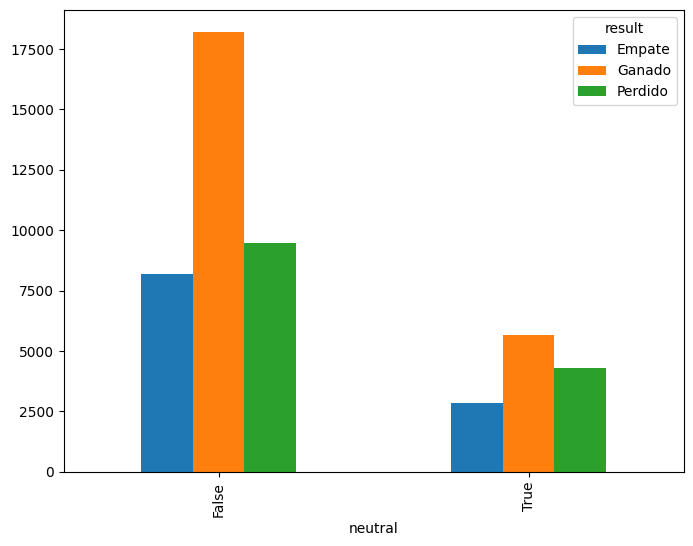

In [121]:
resultados_neutral = data_results.groupby (['neutral', 'result']).size().unstack()
resultados_neutral.plot(kind='bar',figsize= (8,6))


la conclusion es que la sede importa, ahora vamos a ver como influencia el paso del tiempo

In [122]:
data_results['year'] = pd.to_datetime(data_results['date']).dt.year
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Ganado,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Ganado,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Ganado,1876


In [123]:
partidos_por_año = data_results.groupby('year').size()
partidos_por_año.tail()

,0
year,
2021,1115
2022,969
2023,1054
2024,1173
2025,682


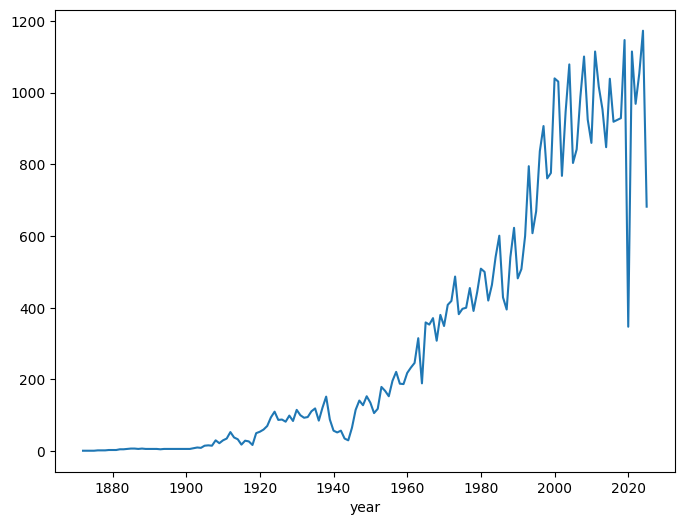

In [124]:
plt.figure(figsize=(8,6))
sns.lineplot(x=partidos_por_año.index, y=partidos_por_año.values)
plt.show()

In [125]:
goles_casa_por_año = data_results.groupby('year')['home_score'].sum()
goles_visitante_por_año = data_results.groupby('year')['away_score'].sum()

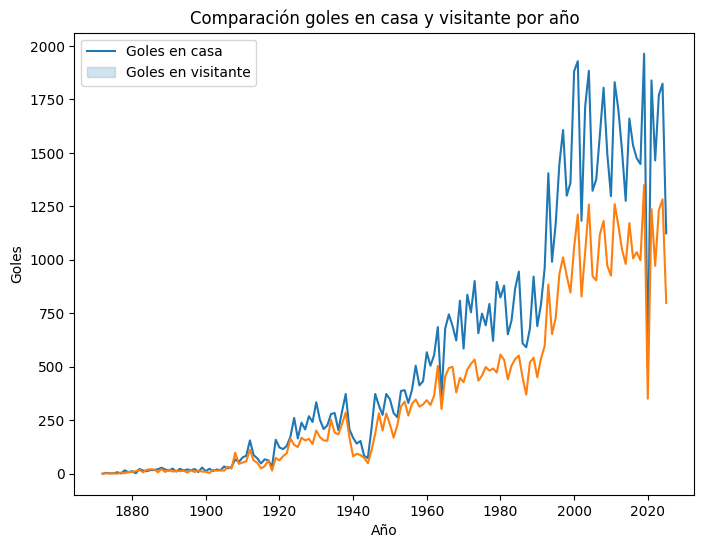

In [126]:
plt.figure(figsize=(8,6))
sns.lineplot(x=goles_casa_por_año.index, y=goles_casa_por_año.values)
sns.lineplot(x=goles_visitante_por_año.index, y=goles_visitante_por_año.values)
plt.title('Comparación goles en casa y visitante por año')
plt.xlabel('Año')
plt.ylabel('Goles')
plt.legend(['Goles en casa', 'Goles en visitante'])
plt.show()

In [127]:
equipos_casa = data_results.groupby(['home_team', 'result']).size().unstack()
equipos_casa

result,Empate,Ganado,Perdido
home_team,,,
Abkhazia,8.0,11.0,3.0
Afghanistan,11.0,18.0,18.0
Albania,48.0,78.0,81.0
Alderney,1.0,1.0,46.0
Algeria,82.0,198.0,62.0
...,...,...,...
Yugoslavia,37.0,108.0,45.0
Zambia,94.0,182.0,54.0
Zanzibar,10.0,20.0,32.0


In [128]:
equipos_casa.sort_values(by='Ganado', ascending=False).head(10)

result,Empate,Ganado,Perdido
home_team,,,
Brazil,114.0,434.0,60.0
Argentina,127.0,402.0,70.0
Mexico,136.0,348.0,110.0
Germany,116.0,341.0,94.0
England,118.0,339.0,88.0
South Korea,128.0,325.0,94.0
France,105.0,315.0,115.0
Sweden,107.0,313.0,111.0
Italy,126.0,309.0,55.0


In [129]:
equipos_casa.sort_values(by='Perdido', ascending=False).head(10)

result,Empate,Ganado,Perdido
home_team,,,
Luxembourg,41.0,32.0,180.0
Finland,71.0,120.0,169.0
Malta,52.0,47.0,154.0
Northern Ireland,74.0,115.0,148.0
Norway,105.0,183.0,145.0
Switzerland,102.0,199.0,142.0
Singapore,78.0,149.0,139.0
Austria,87.0,234.0,136.0
Indonesia,87.0,210.0,131.0


In [130]:
equipos_casa.sort_values(by='Empate', ascending=False).head(10)

result,Empate,Ganado,Perdido
home_team,,,
Mexico,136.0,348.0,110.0
South Korea,128.0,325.0,94.0
Argentina,127.0,402.0,70.0
Italy,126.0,309.0,55.0
England,118.0,339.0,88.0
Germany,116.0,341.0,94.0
Brazil,114.0,434.0,60.0
Malaysia,110.0,239.0,124.0
Malawi,109.0,160.0,98.0


In [131]:
equipos_visita = data_results.groupby(['away_team', 'result']).size().unstack()
equipos_visita.sort_values(by='Ganado', ascending=False).head(10)

result,Empate,Ganado,Perdido
away_team,,,
Finland,94.0,264.0,94.0
Uruguay,134.0,237.0,208.0
Paraguay,130.0,230.0,131.0
Switzerland,98.0,221.0,115.0
Chile,98.0,219.0,88.0
Sweden,124.0,214.0,226.0
Northern Ireland,85.0,211.0,68.0
Hungary,112.0,203.0,191.0
Norway,89.0,202.0,142.0


In [132]:
equipos_visita.sort_values(by='Perdido', ascending=False).head(10)

result,Empate,Ganado,Perdido
away_team,,,
England,139.0,118.0,282.0
Germany,97.0,125.0,252.0
Brazil,101.0,110.0,234.0
Sweden,124.0,214.0,226.0
South Korea,124.0,121.0,209.0
Uruguay,134.0,237.0,208.0
Hungary,112.0,203.0,191.0
Argentina,130.0,149.0,183.0
Russia,121.0,115.0,181.0


In [133]:
equipos_visita.sort_values(by='Empate', ascending=False).head(10)

result,Empate,Ganado,Perdido
away_team,,,
England,139.0,118.0,282.0
Uruguay,134.0,237.0,208.0
Paraguay,130.0,230.0,131.0
Argentina,130.0,149.0,183.0
South Korea,124.0,121.0,209.0
Sweden,124.0,214.0,226.0
Russia,121.0,115.0,181.0
Poland,119.0,181.0,161.0
Italy,116.0,117.0,164.0


In [134]:
data_results.value_counts('country').sort_values(ascending=False).head(10)

,count
country,
United States,1464
France,910
Malaysia,828
England,759
Thailand,720
Qatar,719
Sweden,685
Germany,682
United Arab Emirates,596


In [135]:
data_results.value_counts('city').sort_values(ascending=False).head(10)

,count
city,
Kuala Lumpur,737
Bangkok,579
Doha,552
London,441
Budapest,433
Kuwait City,375
Montevideo,372
Vienna,361
Oslo,356


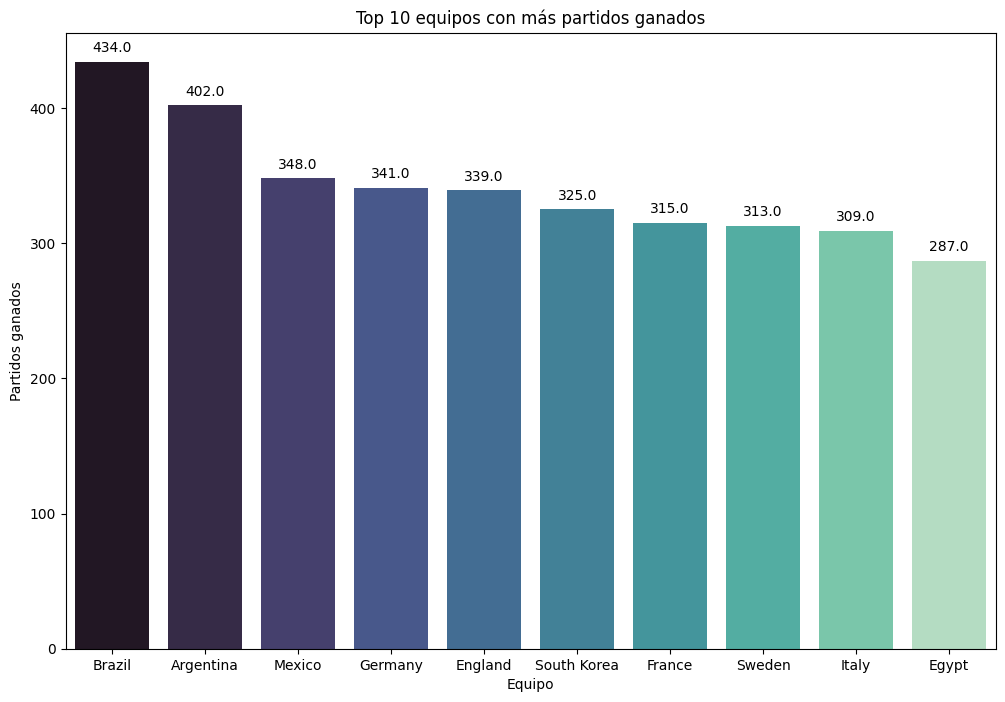

In [136]:
top_equipos_casa=equipos_casa.sort_values(by='Ganado', ascending=False).head(10)
plt.figure(figsize=(12,8))
ax = sns.barplot(x=top_equipos_casa.index, y=top_equipos_casa['Ganado'], palette='mako',hue=top_equipos_casa.index,dodge=False,legend=False)
for bars in ax.patches:
    ax.annotate(str(bars.get_height()),(bars.get_x() + bars.get_width()/ 2., bars.get_height()),
                ha='center', va= 'center',xytext=(0,10), textcoords= 'offset points')
plt.title('Top 10 equipos con más partidos ganados')
plt.xlabel('Equipo')
plt.ylabel('Partidos ganados')
plt.show()

In [137]:
goalscorers_data = pd.read_csv('/content/sample_data/goalscorers.csv')
goalscorers_data.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [138]:
goalscorers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44447 entries, 0 to 44446
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44447 non-null  object 
 1   home_team  44447 non-null  object 
 2   away_team  44447 non-null  object 
 3   team       44447 non-null  object 
 4   scorer     44399 non-null  object 
 5   minute     44191 non-null  float64
 6   own_goal   44447 non-null  bool   
 7   penalty    44447 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


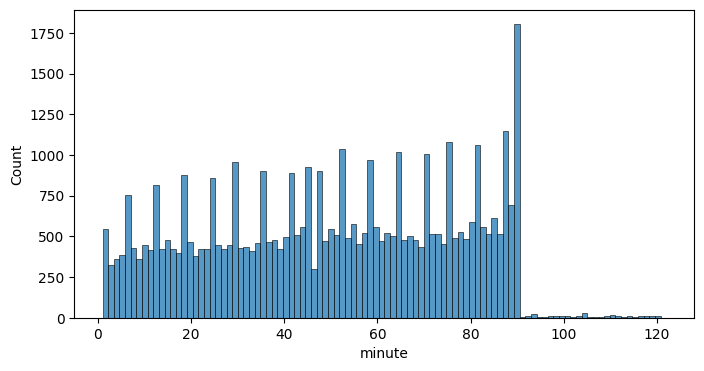

In [139]:
plt.figure(figsize=(8,4))
sns.histplot(goalscorers_data['minute'], bins=100)
plt.show()

In [140]:
filtered_minutes = goalscorers_data['minute'].dropna() #eliminamos datos nulos
counts, bins = np.histogram(filtered_minutes, bins=100)
max_bin_index = np.argmax(counts)
min_range = bins[max_bin_index]
max_range = bins[max_bin_index + 1]
print(f"El rango de minutos con mayor frecuencia de goles es: {min_range:.2f} a {max_range:.2f}")

El rango de minutos con mayor frecuencia de goles es: 89.33 a 90.54


In [141]:
counts[max_bin_index]

np.int64(1803)

In [142]:
penalty_conteo = goalscorers_data.groupby('penalty').size()
penalty_conteo

,0
penalty,
False,41472
True,2975


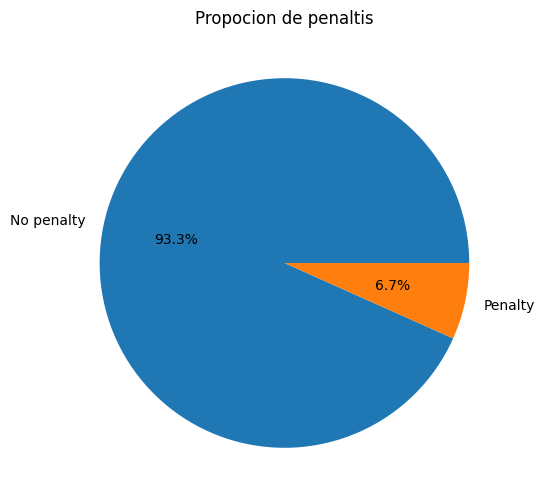

In [143]:
plt.figure(figsize=(6,6))
plt.pie(penalty_conteo, labels = ['No penalty', 'Penalty'], autopct='%1.1f%%')
plt.title('Propocion de penaltis')
plt.show()

In [144]:
goalscorers_data['scorer'].value_counts().head(5)

,count
scorer,
Cristiano Ronaldo,108
Robert Lewandowski,63
Romelu Lukaku,60
Harry Kane,58
Lionel Messi,55
